In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('cleaned_data.xlsx')
df

,restaurant_id,restaurant_link,name,location,rating,total_ratings,price_for_2,cusines
0,354531,https://www.swiggy.com/restaurants/burger-seig...,Burger Seigneur,Sobha Mall,4.4,1000.0,₹1200,"American, Continental"
1,428,https://www.swiggy.com/restaurants/biryani-pot...,Biryani Pot,BTM Layout,3.9,10000.0,₹500,"North Indian, Biryani"
2,5938,https://www.swiggy.com/restaurants/burger-king...,Burger King,Shivaji Nagar,4.1,10000.0,₹350,"Burgers, American"
3,312849,https://www.swiggy.com/restaurants/chopstick-a...,Chopstick,R.T. Nagar,4.0,1000.0,₹350,"Chinese, Thai"
4,30531,https://www.swiggy.com/restaurants/hotel-empir...,Hotel Empire,Hotel Empire International,4.2,10000.0,₹450,"North Indian, Kebabs"
...,...,...,...,...,...,...,...,...
711,423197,https://www.swiggy.com/restaurants/andhra-meal...,Andhra Meal Company,Indiranagar,3.5,100.0,₹200,"South Indian, Home Food"
712,249841,https://www.swiggy.com/restaurants/asian-bowl-...,ASIAN BOWL,BTM Layout,4.2,1000.0,₹250,"Chinese, Coastal"
713,641019,https://www.swiggy.com/restaurants/miami-waffl...,Miami Waffles & Jawbreakers,New Bel Road,NaN,NaN,₹200,"Waffle, Desserts"
714,520806,https://www.swiggy.com/restaurants/panda-momos...,Panda Momos,New Bel Road,3.8,20.0,₹200,"Asian, Tibetan"


In [3]:
df.drop('restaurant_link',axis=1,inplace=True)

In [4]:
df

,restaurant_id,name,location,rating,total_ratings,price_for_2,cusines
0,354531,Burger Seigneur,Sobha Mall,4.4,1000.0,₹1200,"American, Continental"
1,428,Biryani Pot,BTM Layout,3.9,10000.0,₹500,"North Indian, Biryani"
2,5938,Burger King,Shivaji Nagar,4.1,10000.0,₹350,"Burgers, American"
3,312849,Chopstick,R.T. Nagar,4.0,1000.0,₹350,"Chinese, Thai"
4,30531,Hotel Empire,Hotel Empire International,4.2,10000.0,₹450,"North Indian, Kebabs"
...,...,...,...,...,...,...,...
711,423197,Andhra Meal Company,Indiranagar,3.5,100.0,₹200,"South Indian, Home Food"
712,249841,ASIAN BOWL,BTM Layout,4.2,1000.0,₹250,"Chinese, Coastal"
713,641019,Miami Waffles & Jawbreakers,New Bel Road,NaN,NaN,₹200,"Waffle, Desserts"
714,520806,Panda Momos,New Bel Road,3.8,20.0,₹200,"Asian, Tibetan"


In [5]:
df['cusines'] = df['cusines'].str.split(', ')

In [6]:
df = df.explode(['cusines'])
df['price_for_2'] = df['price_for_2'].str.replace("₹","")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 715
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant_id  1289 non-null   int64  
 1   name           1289 non-null   object 
 2   location       1289 non-null   object 
 3   rating         1019 non-null   float64
 4   total_ratings  1019 non-null   float64
 5   price_for_2    1289 non-null   object 
 6   cusines        1289 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 80.6+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean:  3.861138370951909
median:  4.0


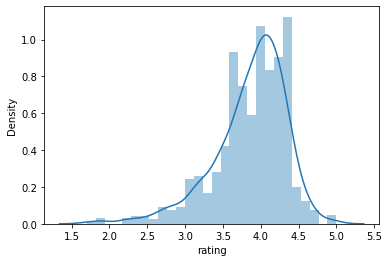

In [8]:
sns.distplot(df.rating)
print('mean: ',df.rating.mean())
print('median: ',df.rating.median())

mean:  1545.7409224730127
median:  100.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


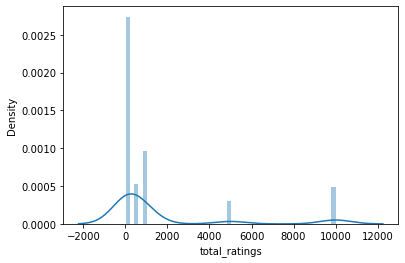

In [9]:
sns.distplot(df.total_ratings)
print('mean: ', df.total_ratings.mean())
print('median: ', df.total_ratings.median())

In [10]:
df.rating.fillna(df.rating.median(),inplace=True)
df.total_ratings.fillna(df.rating.median(),inplace=True)

In [11]:
df.dtypes

restaurant_id      int64
name              object
location          object
rating           float64
total_ratings    float64
price_for_2       object
cusines           object
dtype: object

In [12]:
df.price_for_2 = df.price_for_2.astype('int')
df.total_ratings = df.total_ratings.astype('int')
df.restaurant_id = df.restaurant_id.astype('O')

In [20]:
df.to_csv('cleaned_dataset_final.csv',index=False)

# 